In [1]:
import wandb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
api = wandb.Api()

# Specify the run you want to load daata from

# Pretrained model
run_path_1 = "jiudingsun/HyperDAS/lukgmkxr"

# From scratch model
run_path_2 = "jiudingsun/HyperDAS/nrxbl401" 


pretrained_run = api.run(run_path_1)
from_scratch_run = api.run(run_path_2)

In [18]:
# Load the training loss per step for this wandb Run
pretrained_history = pretrained_run.scan_history()
pretrained_history = pd.DataFrame(pretrained_history)

from_scratch_history = from_scratch_run.scan_history()
from_scratch_history = pd.DataFrame(from_scratch_history)

In [21]:
# Keep only the 'step' and 'train_batch_prediction_loss' columns, and drop all the rows with NaN values

pretrained_history = pretrained_history[['step', 'train_batch_prediction_loss']]
pretrained_history = pretrained_history.dropna()

from_scratch_history = from_scratch_history[['step', 'train_batch_prediction_loss']]
from_scratch_history = from_scratch_history.dropna()

In [29]:
pretrained_history["Initialization"] = "Initialize from pretrained"
from_scratch_history["Initialization"] = "Initialize from scratch"

df = pd.concat([pretrained_history, from_scratch_history])

'plt.xlim(0, 12500)\nplt.ylim(0, 8)'

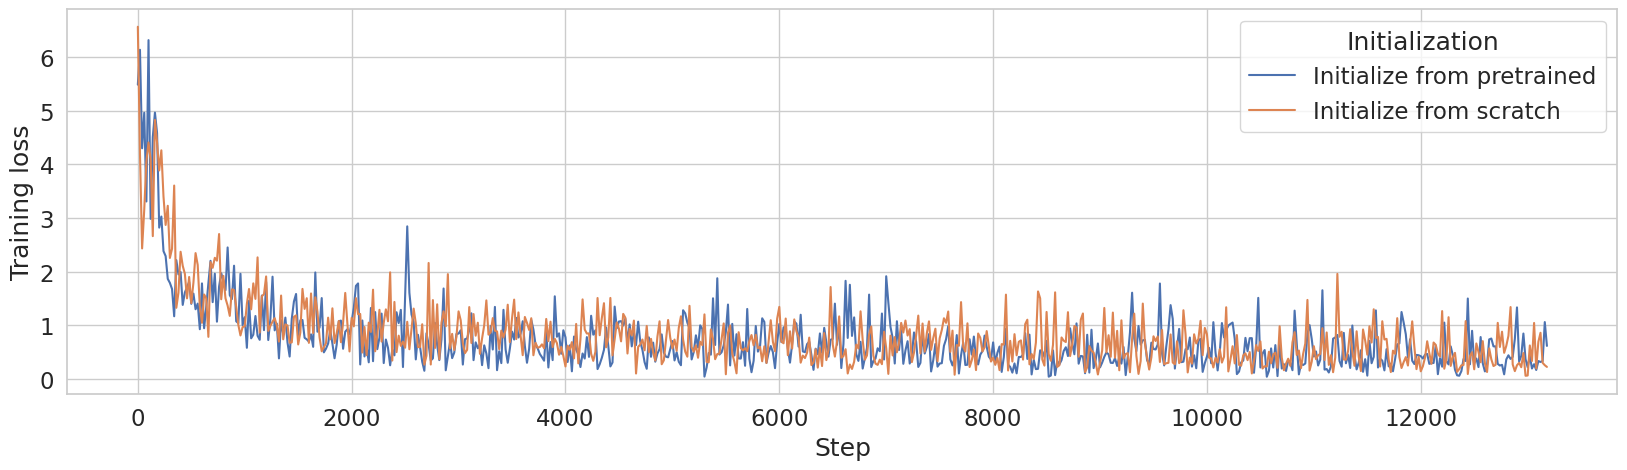

In [ ]:
# Plot every 10 steps
sparse_df = df[df.step % 20 == 0]
# Plot the training loss per step
sns.set(style='whitegrid', font_scale=1.5)
plt.figure(figsize=(20, 5))
ax = sns.lineplot(x='step', y='train_batch_prediction_loss', hue='Initialization', data=sparse_df)

plt.xlabel('Step')
plt.ylabel('Training loss')

plt.savefig("initialization_comparison.pdf")

"""plt.xlim(0, 12500)
plt.ylim(0, 8)"""